# Proyecto Final Temas selectos de Ingeniería III (Computación Cuántica)


<br>


## Integrantes:
* Acuña carranza Carlos Enrique
* Aguilar Ramos Enrique Alejandro
* Chávez Mejía Luis Héctor
* García Lemus Rocío

# Algoritmo de Shor

La computación cuántica plantea un nuevo paradigma de procesamiento de la información, sustentado en principios fundamentales de la mecánica cuántica como la **superposición**, el **entrelazamiento** y la **interferencia cuántica**. Entre los algoritmos cuánticos que ejemplifican su ventaja computacional respecto a los modelos clásicos, el algoritmo de **Shor** destaca por su capacidad para factorizar enteros grandes en tiempo polinomial, resolviendo un problema cuya versión clásica más eficiente requiere tiempo subexponencial. Esta propiedad lo convierte en una amenaza directa para la criptografía de clave pública basada en la factorización, en particular el esquema **RSA**.

En esta sección se expone el marco teórico necesario para comprender los componentes fundamentales del algoritmo de Shor, sin entrar aún en su implementación formal. Se analizarán los fundamentos matemáticos y computacionales de la **Transformada de Fourier Cuántica (QFT)** y la **Estimación de Fase Cuántica (QPE)**, herramientas que permiten la extracción eficiente de información de periodicidad, y que constituyen el núcleo del poder computacional del algoritmo. Asimismo, se introducirá brevemente el esquema criptográfico **RSA**, cuyo diseño está basado en la dificultad computacional de la factorización entera, y cuya vulnerabilidad motiva el estudio de Shor.

## Criptografía de Clave Pública: Esquema RSA

El esquema **RSA** (Rivest–Shamir–Adleman) es uno de los sistemas criptográficos más ampliamente utilizados para asegurar la confidencialidad y la autenticidad en la transmisión de datos. Su seguridad se fundamenta en la aparente ineficiencia de los algoritmos clásicos para factorizar un número entero compuesto \( N \) en sus factores primos.

El procedimiento de generación de claves RSA consiste en los siguientes pasos:

1. Selección de dos enteros primos grandes p y q.
2. Cálculo de su producto:  
   $$
   N = p \cdot q
   $$
3. Cálculo de la función totiente de Euler:  
   $$
   \phi(N) = (p - 1)(q - 1)
   $$
4. Elección de un entero $e$, tal que $1 < e < \phi(N)$ y $\gcd(e, \phi(N)) = 1$.
5. Cálculo del inverso multiplicativo $d$ de $e \mod \phi(N)$:  
   $$
   d \equiv e^{-1} \mod \phi(N)
   $$

Con estos valores se define la clave pública como el par $(N, e)$, mientras que $d$ constituye la clave privada. El proceso de cifrado y descifrado se realiza mediante exponenciación modular:

- **Cifrado:**  
  $$
  c \equiv m^e \mod N
  $$
- **Descifrado:**  
  $$
  m \equiv c^d \mod N
  $$

En la práctica, el tamaño de $N$ se elige suficientemente grande (por ejemplo, 2048 bits) para asegurar que su factorización sea computacionalmente inviable en sistemas clásicos. No obstante, el algoritmo de Shor amenaza esta suposición al ofrecer un método polinomial para obtener los factores primos de $N$, comprometiendo así la seguridad de RSA.

## Transformada de Fourier Cuántica (QFT)

La **Transformada de Fourier Cuántica (Quantum Fourier Transform, QFT)** es la versión cuántica de la transformada discreta de Fourier (DFT), aplicada a estados cuánticos. Es una operación lineal unitaria fundamental que permite transformar la representación de un estado en la base computacional a una base de frecuencias, exponiendo estructuras periódicas en las amplitudes del sistema.

Dado un estado base $|x\rangle$ en un sistema de $n$ qubits, la QFT se define como:

$$
\text{QFT}(|x\rangle) = \frac{1}{\sqrt{2^n}} \sum_{k=0}^{2^n - 1} e^{2\pi i xk / 2^n} |k\rangle
$$

La implementación eficiente de la QFT en circuitos cuánticos (con complejidad \( O(n^2) \)) la convierte en una herramienta esencial para algoritmos que explotan periodicidades ocultas, como el de Shor. Su capacidad para generar interferencias constructivas y destructivas permite amplificar la probabilidad de medir resultados que revelen información clave sobre las propiedades de funciones periódicas.

## Estimación de Fase Cuántica (QPE)

La **Estimación de Fase Cuántica (Quantum Phase Estimation, QPE)** es un procedimiento central en algoritmos cuánticos que requieren estimar con precisión la fase asociada a un autovalor de un operador unitario. Específicamente, dado un operador unitario $U$ y un autovector $|u\rangle$ tal que:

$$
U|u\rangle = e^{2\pi i \phi}|u\rangle, \quad \text{con } \phi \in [0, 1)
$$

el objetivo de QPE es obtener una aproximación de $\phi$ con alta probabilidad.

El esquema general de QPE involucra:

1. Un registro auxiliar de $t$ qubits (control), inicializado en el estado $|0\rangle^{\otimes t}$, al cual se aplica una superposición Hadamard:  
   $$
   \frac{1}{\sqrt{2^t}} \sum_{k=0}^{2^t - 1} |k\rangle
   $$
2. Un registro objetivo inicializado en el autovector $|u\rangle$.
3. Aplicación secuencial de puertas controladas $U^{2^j}$, que introducen fases proporcionales a potencias de dos.
4. Aplicación de la QFT inversa al registro de control.
5. Medición del registro de control para obtener una estimación binaria de $\phi$.

QPE permite, en el contexto del algoritmo de Shor, determinar la **periodicidad** de una función modular exponencial asociada a una base $a$, lo cual es clave para deducir los factores de $N$.

Al ejecutar QPE obtendremos $2^n \phi$ donde $n$ es el número de qubits utilizados para estimar la fase.

## Protocolo para el Algoritmo de Shor

A partir de dos números primos $p$ y $q$ obtenemos $N=pq$

1. Obtener un número aleatorio $a$ y obtener $gcd(a,N)$  
          Si $gcd(a,N)\neq 1$ significa que $a$ es $p$ o $q$

2. Dado $f(x)=a^r \text{mod} \space N$, obtener $r \in  \mathbb{N}$ más pequeño tal  
que $a^r \equiv 1\space \text{mod}  N$. $r$ es llamado el periodo de la función. Este  
paso es el único que emplea una computadora cuántica para calcular $r$

3. Si $r$ es impar, volver al paso 1 e intentar con otro valor de $a$. Si $r$ es par proceder al paso 4.

4. Si $a^{r/2}+1 \equiv 0 \text{mod}  N$, regresar al paso 1 e intertar con otro valor de $a$.  
Si $a^{r/2}+1 \not\equiv 0 \text{mod}  N$ proceder al paso 5.

5. Obtener $d=gcd(a^{r/2}-1,N)$, $d$ es $p$ o $q$

## Analisis del Paso 2 (Parte cuántica)

Ahora profundicemos en como funciona la parte cuántica del Algoritmo de Shor:

**Paso 2.0.** Obtenermos un $n \in \mathbb{N}$ tal que $N^2 \leq 2^n<2N^2$. Iniciamos con dos registros de cubits, un primer registro con $n$ cubits y un segundo registro con $\lceil{log_2N}\rceil $. Ambor los inicializamos en 0:

$$\ket{\psi_0}=\ket{0}\ket{0}$$

**Paso 2.1.** Aplicamos la compuerta Hadamard a cada uno de los cubit del primer registro. Con esto obtenemos un estado en superposición de todos los posibles valores desde $0$ hasta $N$

$$\ket{\psi_1}=\frac{1}{\sqrt{N}} \sum_{x=0}^{N - 1} \ket{x}\ket{0}$$

**Paso 2.2.** Aplicamos la función modular exponencial $f(x) = a^x \text{mod} \space N$ al circuito:

$$\ket{\psi_2}=\frac{1}{\sqrt{N}} \sum_{x=0}^{N - 1} \ket{x}\ket{a^x \text{mod} N}$$

Después de este paso $\ket{\psi_2}$ se ahora se comporta como un estado entrelazado entre todos los posibles valores de entrada de $0$ hasta $N$ con su correspondiente valor de $a^x \text{mod} N$, esto se logra gracias a las propiedades de **entrelazamiento** y **paralelismo** cuantico  

**Paso 2.3.** Aplicamos la QFT inversa al primer registro:

$$\ket{\psi_3}=\frac{1}{N} \sum_{x=0}^{N - 1} \sum_{z=0}^{N - 1} e^{(2\pi  i)(xzN)} \ket{z}\ket{a^x \text{mod} N}$$

Debido a la propiedad de interferencia, los términos $\ket{z}$ cumplen con:
$$z=qN/r$$

tienen una amplitud mayor, donde $q$ es un numero entero aleatoreo entre $0$ y $r-1$ y $r$ es el periodo de la función $f(x) = a^x \text{mod N}$  

**Paso 2.4.** Medimos el primer registro con lo que obtenermos un resultado clásico con una alta probabilidad de que la aproximación de la fraccion continua de $z/N$ sea un múltiplo entero del periodo. Esta parte se puede realizar con una computadora cuántica.

## Circiuto cuántico del Algoritmo de Shor

Considerando los pasos anteriores obtenemos que el circuito de la parte cuántica del Algorirmo de Shor es:

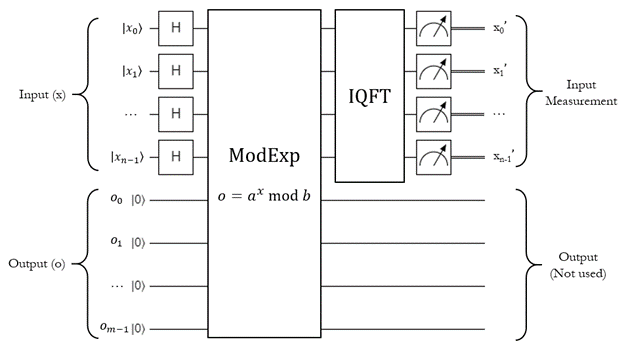

## Función modular exponencial

Tanto la compuerta Hadamard y la QFT inversa son dos funciones ya conocidas, por lo que nos centraremos en la implementación de la función modular exponencial.

Iniciamos enfatizando que cualquier número entero $x$ puede ser descompuesto de la siguiente forma:

$$x=x_0*2^{n-1}+x_1*2^{n-2}+...x_{n-1}*2^{0}$$

Donde $x_0,x_1...x_n$ es la representación binaria de $x$

Ahora reescribamos la función modular exponencial como:

$$f(x) = a^x \text{mod} \space N = a^{x_0*2^{n-1}+x_1*2^{n-2}+...x_{n-1}*2^{0}} \text{mod} \space N$$

Utilizando la regla de producto de exponente, la expresión se puede reescribir como:
$$=a^{x_0*2^{n-1}}*a^{x_1*2^{n-2}}*...*a^{x_n*2^{0}} \text{mod} \space N$$
$$=a^{x_n*2^{0}}...(a^{x_1*2^{n-2}}(a^{x_0*2^{n-1}}\text{mod} \space N)\text{mod}\space N)...\text{mod} \space N$$

De esta manera, la función modular exponencial se puede descomponer como una serie de multiplicaciones $\text{mod} \space N$. Los valores de $a, a^2, ..., a^{n-1} \text{mod} \space N$ pueden ser calculados de manera eficiente por una computadora clásica empleando raices cuadradas repetidas.

Ahora consideremos el caso especial cuando $x_i = 0$:

$$\ket{r'}=(\ket{r}*a^{0*2^{n-i-1}} \text{mod} \space N)\  \text{mod} \space N$$
$$=(\ket{r}*a^{0} \text{mod} \space N)\  \text{mod} \space N$$
$$=(\ket{r}* 1 \ \text{mod} \space N)\  \text{mod} \space N$$
$$=(\ket{r} \ \text{mod} \space N)\  \text{mod} \space N$$
$$=\ket{r}$$

Esto quiere decir que cuanco el cubit $x_i$ es 0, la función modulo exponencial no tiene efecto, lo que recuerda al comportamiento de una compuerta controlada.

Con esto pordemos simplificar la función modular exponencial como el siguiente circuito:

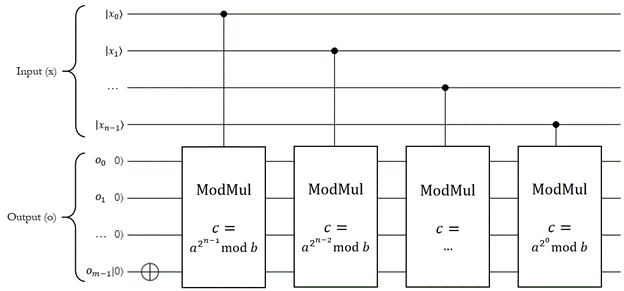

## Factorización del número 15 usando el algoritmo de Shor (Clásico)

Como caso de estudio, aplicaremos el algoritmo de Shor para factorizar el número $N = 15$. Este ejemplo sirve como ilustración didáctica de los primeros pasos del algoritmo, incluyendo la elección de una base y la identificación del período de una función modular exponencial.

El número que deseamos factorizar es:

$$
15 = (1111)_2 \quad \text{(4 bits)}
$$

### Paso 1: Elección de un número coprimo con 15

Seleccionamos un número $a$ tal que $ \gcd(a, 15) = 1 $. En este caso, elegimos:

$$
a = 13
$$


In [29]:
N = 5*3
a = 13

import math
math.gcd(a,N)

1

### Paso 2: Cálculo de la función $13^x \mod 15$

Nuestro objetivo ahora es determinar el **período** $r$ de la función:

$$
f(x) = 13^x \mod 15
$$

Calculamos los primeros valores de $f(x)$ para $x = 0, 1, 2, \dots$ hasta observar una repetición:

| $x$ | $ 13^x \mod 15$ |
|--------|--------------------|
| 0      | 1                  |
| 1      | 13                 |
| 2      | 4                  |
| 3      | 7                  |
| 4      | 1                  |
| 5      | 13                 |
| 6      | 4                  |
| 7      | 7                  |

Se observa que la secuencia comienza a repetirse en \( x = 4 \), por lo tanto, el período es:

$$
r = 4
$$


[1, 13, 4, 7, 1, 13, 4, 7, 1, 13, 4, 7, 1, 13, 4]


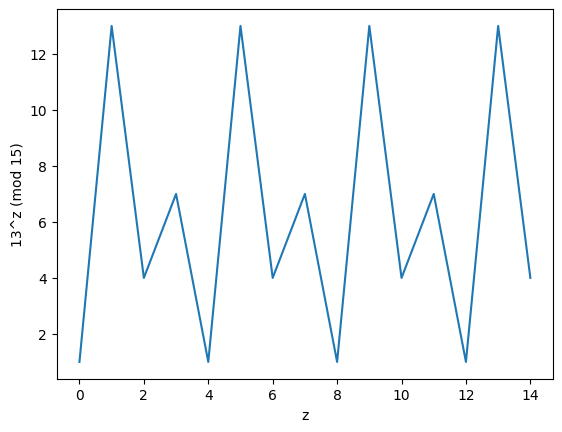

In [30]:
import matplotlib.pyplot as plotter

z = list(range(N))
y = [a**z0 % N for z0 in z]
print(y)

plotter.plot(z, y)
plotter.xlabel('z')
plotter.ylabel(f'{a}^z (mod {N})')
plotter.show()

### Paso 3: Cálculo de factores a partir del período

Con el período $r = 4$ obtenido en el paso anterior, utilizamos la siguiente propiedad del algoritmo de Shor:

Si $r$ es **par**, y además $a^{r/2} \not\equiv -1 \mod N$, entonces los factores de $N$ pueden obtenerse computando el máximo común divisor de $a^{r/2} \pm 1$ con $N$.

Calculamos:

$$
x = a^{r/2} \mod N = 13^{4/2} \mod 15 = 13^2 \mod 15 = 169 \mod 15 = 4
$$

A continuación, evaluamos:

- $x + 1 = 4 + 1 = 5$
- $x - 1 = 4 - 1 = 3$

Obtenemos los factores como:

- $\gcd(x + 1, N) = \gcd(5, 15) = 5$
- $\gcd(x - 1, N) = \gcd(3, 15) = 3$

Por tanto, los factores no triviales de 15 son:

$$
\{p, q\} = \{3, 5\}
$$

Este resultado confirma que el algoritmo de Shor, incluso en este caso pequeño, puede factorizar correctamente un número compuesto utilizando principios fundamentales de la computación cuántica.

In [33]:
r = z[y[1:].index(1)+1]
print(f'r = {r}')

if r % 2 == 0: # es par
    x = (a**(r/2.)) % N
    print(f'x = {x}')
    if((x+1) % N != 0):
        print(math.gcd((int(x)+1), N), math.gcd((int(x)-1), N))
    else:
        print("x + 1 is 0 (mod N)")
else: # es impar
    print(f'r = {r} is odd')

r = 4
x = 4.0
5 3


## Implementación del circuito cuántico 

Intento 1: probando con a = 17
  Resultado más común: 00000 = 0
  Fracción estimada: 0/1
  ❌ r inválido.
Intento 2: probando con a = 8
  Resultado más común: 10100 = 20
  Fracción estimada: 5/8
  ❌ r válido pero no se obtuvieron factores no triviales.
Intento 4: probando con a = 5
  Resultado más común: 10000 = 16
  Fracción estimada: 1/2
  ❌ r inválido.
Intento 6: probando con a = 20
  Resultado más común: 10111 = 23
  Fracción estimada: 13/18
  ❌ r válido pero no se obtuvieron factores no triviales.
Intento 10: probando con a = 17
  Resultado más común: 10100 = 20
  Fracción estimada: 5/8
  ❌ r inválido.
Intento 11: probando con a = 19
  Resultado más común: 10000 = 16
  Fracción estimada: 1/2
  ❌ r inválido.
Intento 12: probando con a = 10
  Resultado más común: 11000 = 24
  Fracción estimada: 3/4
  ❌ r inválido.
Intento 13: probando con a = 2
  Resultado más común: 00011 = 3
  Fracción estimada: 2/21
  ❌ r inválido.
Intento 14: probando con a = 2
  Resultado más común: 00000 = 0
  

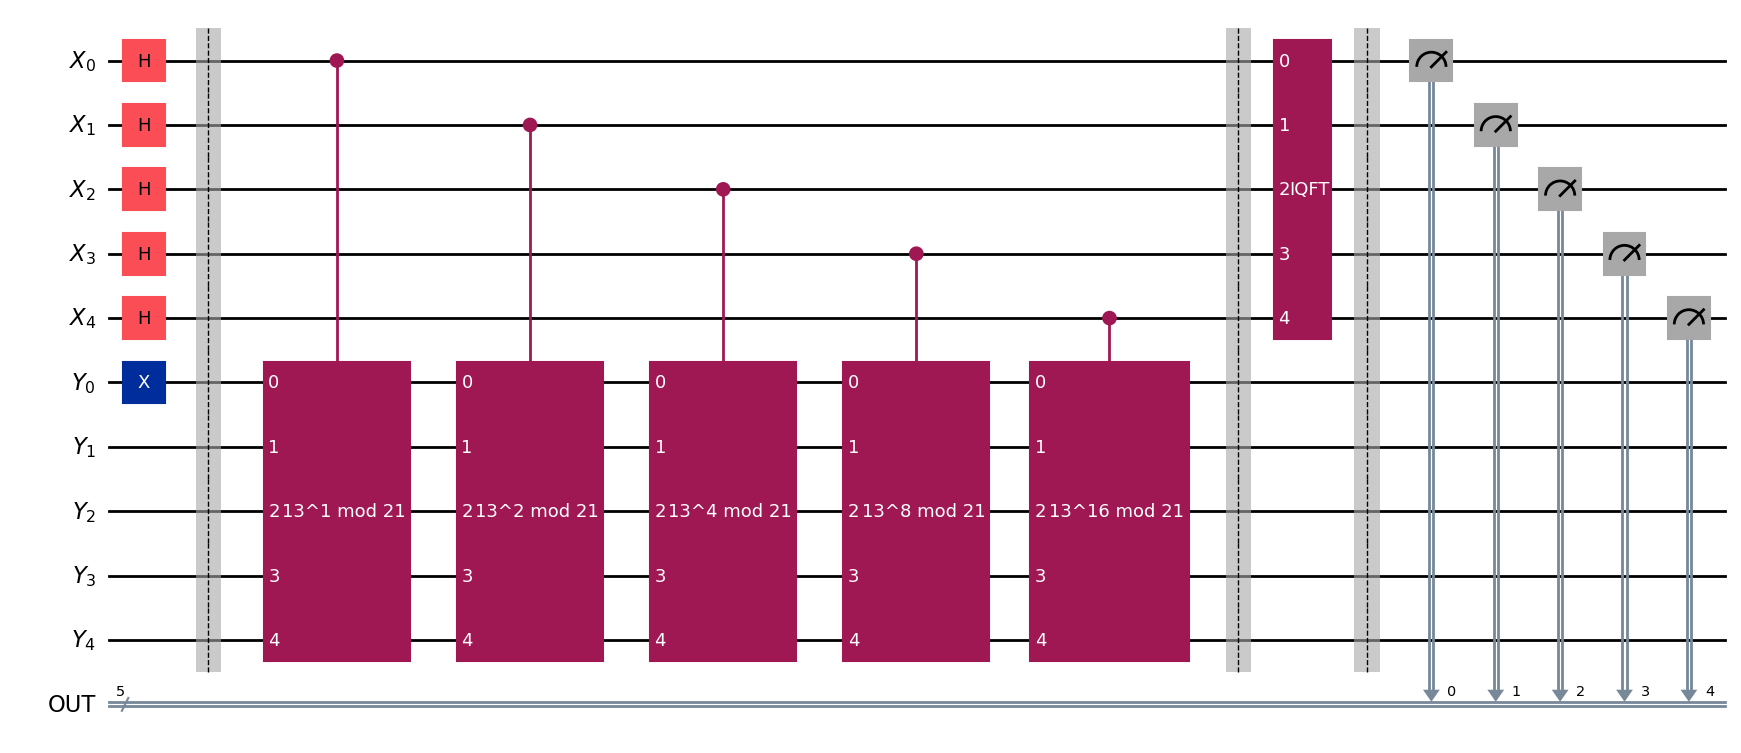

Resultado final: 3, 7


In [78]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT
from qiskit.primitives import StatevectorSampler
from math import gcd
from fractions import Fraction
from qiskit.visualization import plot_histogram
import random

def c_amod21(a, power):
    U = QuantumCircuit(5)
    
    for _iteration in range(power):
        if a in [2,11,20]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.cx(4,3)
            U.cx(3,2)
            U.cx(2,1)
            U.cx(1,0)
        if a in [4,16]:
            U.swap(0,2)
            U.swap(1,3)
            U.swap(2,4)
            U.cx(4,2)
            U.cx(3,1)
            U.cx(2,0)
        if a in [5,17]:
            U.swap(0,2)
            U.swap(1,3)
            U.x(0)
            U.cx(0,1)
            U.cx(1,2)
            U.cx(2,3)
        if a in [8,13]:
            U.swap(0,3)
            U.swap(1,4)
            U.x(0)
            U.cx(0,1)
            U.cx(1,2)
        if a in [10,19]:
            U.swap(0,1)
            U.swap(1,3)
            U.swap(2,4)
            U.x(1)
            U.cx(1,2)
        if a in [11,20]:
            for q in range(5):
                U.x(q)
    
    U = U.to_gate()
    U.name = f"{a}^{power} mod 21"
    c_U = U.control()
    return c_U

def c_amod15(a, power):
    U = QuantumCircuit(4)
    for _iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{power} mod 15"
    c_U = U.control()
    return c_U

def build_shor_circuit(N, a, n_count=5, work_qubits=5):
    x = QuantumRegister(n_count, 'X')
    y = QuantumRegister(work_qubits, 'Y')
    o = ClassicalRegister(n_count, 'OUT')
    qc = QuantumCircuit(x,y,o)
    #qc = QuantumCircuit(n_count + work_qubits, n_count)

    # Hadamard en registro de control
    for q in range(n_count):
        qc.h(q)
    # Inicializar |1⟩ en registro de trabajo
    qc.x(n_count)

    qc.barrier()
    
    # Aplicamo c_amod15(a, power)
    for i in range(n_count):
        if N == 21:
            CU = c_amod21(a, 2 ** i)
        else:
            CU = c_amod15(a, 2 ** i)
        if CU is None:
            return None
        qc.append(CU, [i] + list(range(n_count, n_count + work_qubits)))
    qc.barrier()

    # Aplicamos la QFT inversa para obtener el periodo
    qc.append(QFT(n_count, inverse=True, do_swaps=True), range(n_count))
    qc.barrier()
    qc.measure(range(n_count), range(n_count))
    return qc

def run_shor(N=21, max_tries=50):

    n_count=N.bit_length()
    work_qubits=n_count
    
    for intento in range(max_tries):
        a = random.randint(2, N - 1)
        #a = 13
        if gcd(a, N) != 1:
            continue

        print(f"Intento {intento+1}: probando con a = {a}")
        qc = build_shor_circuit(N, a, n_count, work_qubits)
        if qc is None:
            print(f"  No se puede construir circuito para a = {a}")
            continue

        sampler = StatevectorSampler()
        job = sampler.run([qc])
        result = job.result()
        counts = result[0].data.OUT.get_counts()
        most_common = max(counts, key=counts.get)
        decimal = int(most_common, 2)
        frac = Fraction(decimal, 2 ** n_count).limit_denominator(N)
        s, r = frac.numerator, frac.denominator
            
        print(f"  Resultado más común: {most_common} = {decimal}")
        print(f"  Fracción estimada: {s}/{r}")

        if r % 2 == 0 and pow(a, r, N) == 1:
            factor1 = gcd(pow(a, r//2) - 1, N)
            factor2 = gcd(pow(a, r//2) + 1, N)
            if factor1 != 1 and factor2 != 1:
                print(f"✅ Factores encontrados: {factor1}, {factor2}")
                display(qc.draw('mpl'))
                return factor1, factor2
            else:
                print("  ❌ r válido pero no se obtuvieron factores no triviales.")
        else:
            print("  ❌ r inválido.")
    return None, None

# Ejecutar
factor1, factor2 = run_shor(21, 50)
print(f"Resultado final: {factor1}, {factor2}")

## Evolución matemática del circuito cuántico de Shor para $N = 15$ y $a = 13$

El algoritmo de Shor explota la capacidad de la computación cuántica para estimar el **período $r$** de una función periódica $f(x) = a^x \mod N$, lo cual permite factorizar un número compuesto $N$ de manera eficiente.

Analizaremos matemáticamente cómo evoluciona el estado cuántico del circuito para el caso concreto:

- $N = 15$
- $a = 13$
- Tamaño del registro de control: 4 qubits
- Tamaño del registro objetivo: 4 qubits

---

### **Paso 0: Estado inicial**

Inicializamos un sistema cuántico compuesto por 8 qubits:

- Registro de control $|x\rangle$: 4 qubits en $|0\rangle$
- Registro objetivo $|\omega\rangle$: 4 qubits en $|1\rangle$ (el estado clásico "1" se representa como $|0001\rangle$)

Estado total inicial:

$$
|\psi_0\rangle = |0\rangle^{\otimes 4}_x \otimes |0001\rangle_\omega
$$

---

### **Paso 1: Hadamard sobre el registro de control**

Se aplica una puerta Hadamard $H$ a cada qubit del registro de control. Esta operación transforma cada $|0\rangle$ en $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$, produciendo una superposición uniforme:

$$
H^{\otimes 4}|0000\rangle = \frac{1}{\sqrt{2^4}} \sum_{x=0}^{15} |x\rangle
$$

Por lo tanto, el estado del sistema se convierte en:

$$
|\psi_1\rangle = \frac{1}{\sqrt{16}} \sum_{x=0}^{15} |x\rangle_x \otimes |0001\rangle_\omega
$$

>  Este paso crea una superposición cuántica que permite explorar en paralelo todos los valores de $x$, facilitando el muestreo de la periodicidad de $a^x \mod N$.

---

### **Paso 2: Exponenciación modular controlada**

Ahora se aplica un operador unitario controlado $U$ tal que:

$$
U|x\rangle_x \otimes |y\rangle_\omega = |x\rangle_x \otimes |a^x y \mod N\rangle_\omega
$$

Dado que el registro objetivo empieza en $|1\rangle$, este paso se reduce a:

$$
|x\rangle \otimes |1\rangle \mapsto |x\rangle \otimes |13^x \mod 15\rangle
$$

Por lo tanto, el estado final tras esta etapa es:

$$
|\psi_2\rangle = \frac{1}{\sqrt{16}} \sum_{x=0}^{15} |x\rangle \otimes |13^x \mod 15\rangle
$$

Veamos algunos valores explícitos:

| $ x $ | $ 13^x \mod 15 $ |
|--------|--------------------|
| 0      | 1                  |
| 1      | 13                 |
| 2      | 4                  |
| 3      | 7                  |
| 4      | 1                  |
| 5      | 13                 |
| 6      | 4                  |
| 7      | 7                  |
| ...    | ...                |

Se observa que la función es **periódica con período $ r = 4 $**.

>  Esta operación es clave. La periodicidad de $ x \mapsto 13^x \mod 15 $ queda **codificada en el entrelazamiento** entre los registros de control y objetivo. No se puede acceder directamente al período $r$ sin procesar cuánticamente el sistema.

---

### **Paso 3: QFT inversa en el registro de control**

Para extraer la información sobre el período, se aplica la **Transformada de Fourier Cuántica inversa (QFT†)** al registro de control. Este paso decodifica la periodicidad, ahora contenida en las fases cuánticas del registro de control.

Formalmente, la QFT inversa aplicada a un estado periódico $|x\rangle$ transforma la superposición de la forma:

$$
\frac{1}{\sqrt{r}} \sum_{k=0}^{r-1} |x + kr\rangle \quad \longrightarrow \quad \text{peaks at } s/r
$$

El resultado es una distribución de probabilidad concentrada en valores de \( x \) que **aproximan múltiplos de $2^n \cdot \frac{s}{r}$**, para enteros $s$ coprimos con $r$.

>  La QFT inversa permite transformar el dominio del tiempo (valores $x $) al dominio de frecuencia (fracciones $s/r$) donde la información del período se vuelve accesible mediante medición.

---

### **Paso 4: Medición del registro de control**

Después de la QFT inversa, se mide el registro de control. En el ejemplo en cuestión, el resultado más frecuente fue:

$$
1100_2 = 12
$$

Dado que el registro de control tiene 4 qubits, el valor medido se interpreta como una estimación de fase de la forma:

$$
\phi = \frac{12}{2^4} = \frac{12}{16} = \frac{3}{4}
$$

Este valor se aproxima a una fracción $\frac{s}{r}$, con:

$$
\frac{s}{r} = \frac{3}{4}
$$

por lo tanto, el período estimado es:

$$
r = 4
$$

> La medición proyecta el sistema sobre un estado base del registro de control. Este valor, interpretado como una fracción binaria, codifica la información sobre la fase $\phi \approx \frac{s}{r}$, que a su vez revela el período $r$ de la función $f(x) = 13^x \mod 15$.

---

### **Paso 5: Obtención de factores**

Una vez estimado el período $r = 4$, se verifica que:

$$
13^4 \mod 15 = 1
$$

Entonces, calculamos:

- $x = 13^{r/2} = 13^2 = 169$
- $\gcd(x - 1, 15) = \gcd(168, 15) = 3$
- $\gcd(x + 1, 15) = \gcd(170, 15) = 5$

Los factores no triviales de $N = 15$ son:

$$
\boxed{3 \quad \text{y} \quad 5}
$$

---



In [79]:
## Limitaciones del algoritmo de Shor